In [1]:
import array
from array import array
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import find_peaks
import numpy as np
import math
from math import sqrt
import os

In [2]:
##установите корректный путь к данным в формате: "pathIn + "/" + prefix + {U} + postfix"
pathIn = "/home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED"
prefix = "led3-50_sipm_" 
postfix = "V_45db_histo.txt"

#список точек по напряжению, при которых набирались данные
Ulist = ['54,00','55,00','55,50','55,87','56,00','56,30','56,50']
#установленное усиление на предусилителе
PSAUGAIN = '45' # in dB
#установка границ подгонки 0 и 1 пиков для каждой точки по напряжению
#peak0
FitXBoardLeftP0 = np.array([-150.,-150.,-150.,-150.,-150.,-150.,-150.])
FitXBoardRightP0 = np.array([200.,200.,200.,200.,240.,240.,240.])
#peak1
FitXBoardLeftP1 = np.array([250,500,900,1100,1050,1300,1300])
FitXBoardRightP1 = np.array([650,1300,1600,1750,1900,1850,2100])
 
#обработка набранных данных/или просто отрисовка
analysis = True
#подгонка двойным Гаусом, иначе одним
fitDoubleGauss = True

#установка границ отрисовки по шкале X
Xleft = -200
Xright = 2100

#имена сохраняемых файлов
outSpectr = 'V_spectr.png'   #"{U} + outSpectr"
outR = 'R_Bias.png'
outEff = 'Eff_Bias.png'
outmu = 'mu_Bias.png'
outGain = 'Gain_Bias.png'

#создание директории куда сохраняем результаты
pathOut = pathIn + '/' + 'results'
if not os.path.exists(pathOut):
    os.mkdir(pathOut)

In [3]:
#определение функций для подгонки данных
def Gauss(x, a, x0, s):
    return a*np.exp(-((x-x0)/s)**2)

def DoubleGauss(x, a1, x01, s1, a2, x02, s2):
    return Gauss(x, a1, x01, s1) + Gauss(x, a2, x02, s2)

def nGauss(x, *p):
    n = len(p)/3
    res = 0
    for i in range(n):
        res += Gauss(x, p[i*3], p[i*3+1], p[i*3+2])
    return res

def plotAllGauss(x, p):
    n = len(p)//3
    for i in range(n):
        plt.plot(x, Gauss(x,p[i*3],p[i*3+1],p[i*3+2]), 'b', linewidth=0.5)

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_54,00V_45db_histo.txt
Колличество найденных пиков n_peaks = 5
Положение пиков на оси X: [   3.521  435.53   867.539 1307.548 1755.557]
0 пик: Параметры гауссианов:  [1.95956951e+04 8.22683317e-01 3.86307418e+01 9.65286064e+01
 8.11661896e+01 1.03904584e+02]
Стандартное отклонение:  59.335006596883204
Квадрат коэффициента корреляции:  0.9999081738594178
1 пик: Параметры гауссианов:  [16780.60501971   440.78429307    56.95372716  3561.52971512
   418.02355551    72.06890518]
Стандартное отклонение:  70.51193994964237
Квадрат коэффициента корреляции:  0.9999004275890964
mean0= 0.8226833165599752 +- 0.06037070472460727  sigma0= 38.630741772376815 +- 0.1334761543758085
mean1= 440.7842930668941 +- 0.8580423702249789  sigma1= 56.953727162526675 +- 1.2561121614408075
R= 10.512911270246128  Gain= 618521.4866497052 +- 1291.154064098234
Eff= 79.93415141627655 +- 1.71040809571096

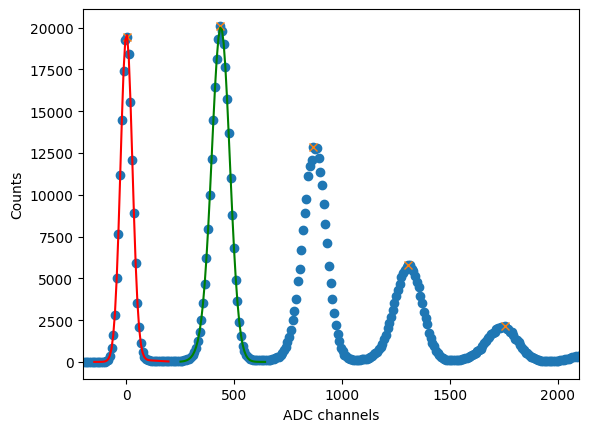

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_55,00V_45db_histo.txt
Колличество найденных пиков n_peaks = 7
Положение пиков на оси X: [-4.479000e+00  9.795410e+02  1.955562e+03  2.915582e+03  3.899602e+03
  4.867622e+03  5.835642e+03]
0 пик: Параметры гауссианов:  [2.75170228e+03 2.92027518e-01 3.72281943e+01 2.14858408e+02
 1.26655416e+01 5.90475067e+01]
Стандартное отклонение:  28.316116708929943
Квадрат коэффициента корреляции:  0.9990669642525912
1 пик: Параметры гауссианов:  [1434.14999073  991.86722969   50.39781788 4560.60089739  971.03961893
   65.7581808 ]
Стандартное отклонение:  36.06247028000069
Квадрат коэффициента корреляции:  0.9995479922396956
mean0= 0.2920275181953999 +- 0.5160026608053271  sigma0= 37.22819430972671 +- 1.1315919138889046
mean1= 991.8672296881118 +- 3.9819885155341455  sigma1= 50.39781788136076 +- 6.162476345949062
R= 29.189217490821765  Gain= 1394009.2830352976 +- 6323.5157969930

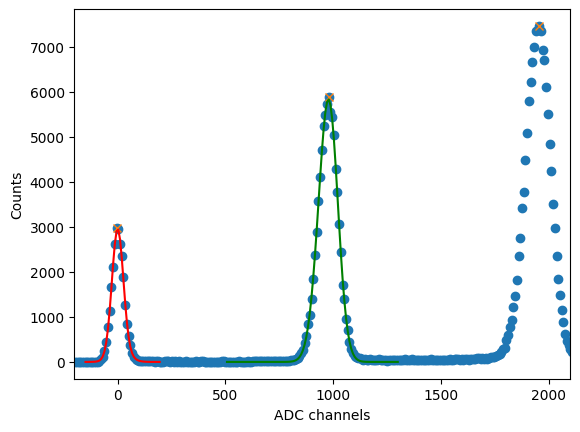

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_55,50V_45db_histo.txt
Колличество найденных пиков n_peaks = 10
Положение пиков на оси X: [3.521000e+00 1.235547e+03 2.475572e+03 3.707598e+03 4.939624e+03
 6.179650e+03 7.403675e+03 8.635701e+03 8.659701e+03 8.715702e+03]
0 пик: Параметры гауссианов:  [656.71262725   2.40286695  40.19375859 656.70965168   2.40866171
  40.19431807]
Стандартное отклонение:  11.51567223672675
Квадрат коэффициента корреляции:  0.999255197415456
1 пик: Параметры гауссианов:  [2268.21448661 1234.01880107   70.96558971  702.50144489 1253.7679331
   52.1787964 ]
Стандартное отклонение:  23.316976866638562
Квадрат коэффициента корреляции:  0.9993480709019814
mean0= 2.4028669514274816 +- 190519.3882998929  sigma0= 40.193758593224 +- 18403.182048416234
mean1= 1253.7679330970504 +- 4.266600254833553  sigma1= 52.17879639834024 +- 7.093035514182129
R= 37.609091670646535  Gain= 1759235.723983096 +- 

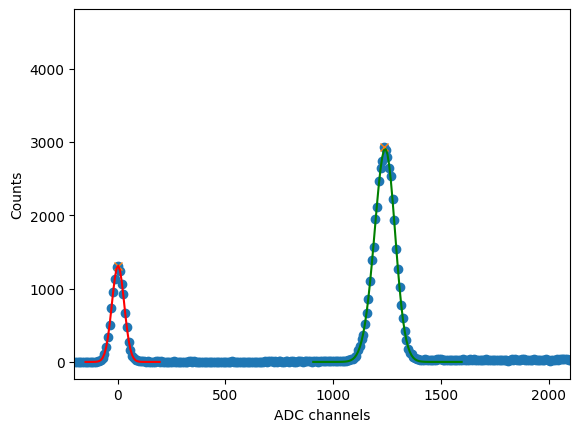

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_55,87V_45db_histo.txt
Колличество найденных пиков n_peaks = 9
Положение пиков на оси X: [3.521000e+00 1.419550e+03 2.843580e+03 4.275610e+03 5.707640e+03
 7.139670e+03 8.523698e+03 8.579700e+03 9.971729e+03]
0 пик: Параметры гауссианов:  [  75.95628223  -13.93578385   11.03318784 1344.46117844    2.62822076
   40.02885258]
Стандартное отклонение:  10.650829583502967
Квадрат коэффициента корреляции:  0.9994231603357409
1 пик: Параметры гауссианов:  [ 145.50486631 1460.7770733    30.84786638 2682.34269803 1425.72056996
   72.26259732]
Стандартное отклонение:  27.0495801943906
Квадрат коэффициента корреляции:  0.9991022855412409
mean0= -13.935783850090095 +- 1.4768199579536225  sigma0= 11.033187835146052 +- 2.5823049347803884
mean1= 1460.7770733010611 +- 4.2166735220060785  sigma1= 30.84786637559358 +- 8.164919882748976
R= 51.192359686582805  Gain= 2073229.9559140608 +- 

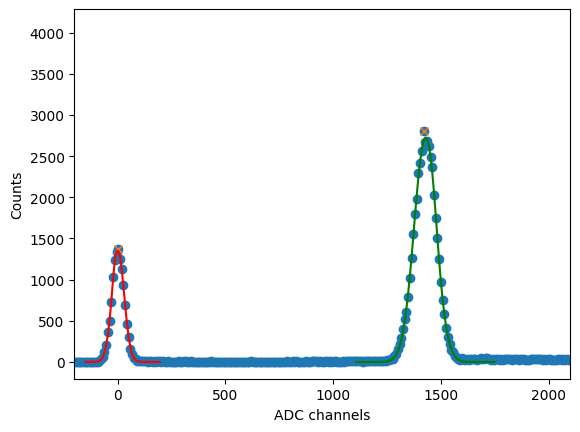

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_56,00V_45db_histo.txt
Колличество найденных пиков n_peaks = 9
Положение пиков на оси X: [3.5210000e+00 1.4995520e+03 2.9795830e+03 4.4676140e+03 5.9556450e+03
 7.4596760e+03 8.9477070e+03 1.0451739e+04 1.0539740e+04]
0 пик: Параметры гауссианов:  [  5.36663521 106.38209662 131.85795852 805.96726326   2.37319449
  39.91353922]
Стандартное отклонение:  8.720937412007782
Квадрат коэффициента корреляции:  0.9987696160544589
1 пик: Параметры гауссианов:  [ 309.3727011  1511.73566632   55.23810305 1512.85206396 1490.63084315
   74.90074381]
Стандартное отклонение:  17.398502278207637
Квадрат коэффициента корреляции:  0.9989169206591573
mean0= 2.373194491631913 +- 0.20358516374768104  sigma0= 39.91353922083912 +- 0.407218376756503
mean1= 1511.735666324267 +- 7.348268464398304  sigma1= 55.2381030511116 +- 12.136824263693503
R= 39.526771420558816  Gain= 2121942.231507362 +- 10

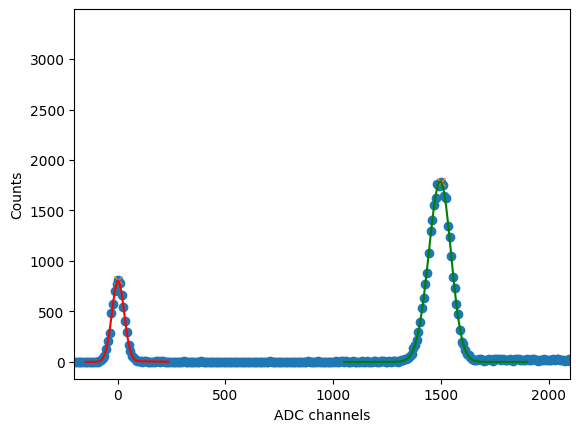

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_56,30V_45db_histo.txt
Колличество найденных пиков n_peaks = 12
Положение пиков на оси X: [3.5210000e+00 1.6595550e+03 3.3155900e+03 4.9556240e+03 6.6116590e+03
 8.2516930e+03 8.2916940e+03 9.8997270e+03 9.9397280e+03 1.1547761e+04
 1.3187796e+04 1.3251797e+04]
0 пик: Параметры гауссианов:  [ 80.10632622  21.74356429   2.75615396 554.18153013   4.0288784
  39.77955501]
Стандартное отклонение:  4.846336844954424
Квадрат коэффициента корреляции:  0.9992347414252355
1 пик: Параметры гауссианов:  [ 108.42259687 1681.48192153   49.17441497 1171.29550005 1653.66412094
   77.16143568]
Стандартное отклонение:  15.925018601975196
Квадрат коэффициента корреляции:  0.9985945050444343
mean0= 21.74356428641722 +- 8254.137861636002  sigma0= 2.756153958771878 +- 6400.143038248768
mean1= 1681.4819215271712 +- 8.494095924364306  sigma1= 49.17441497197877 +- 15.94028350646093
R= 33.8052

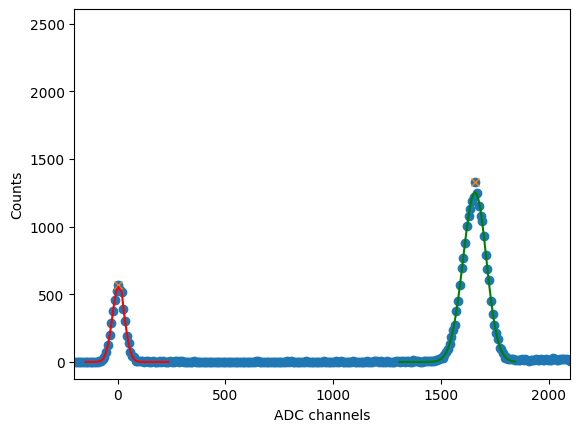

Анализируем данные из файла: /home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM/LED/led3-50_sipm_56,50V_45db_histo.txt
Колличество найденных пиков n_peaks = 10
Положение пиков на оси X: [3.5210000e+00 1.7555570e+03 3.4835930e+03 3.5075940e+03 5.2516300e+03
 6.9876660e+03 8.7317030e+03 1.0483739e+04 1.2179775e+04 1.2219775e+04]
0 пик: Параметры гауссианов:  [599.73044072   6.21456129  37.44834167  78.28190624 -33.56528829
  15.7117731 ]
Стандартное отклонение:  8.436631560264836
Квадрат коэффициента корреляции:  0.9979442045913803
1 пик: Параметры гауссианов:  [1270.22161653 1749.41906211   78.64067795   61.37543802 2613.76403449
  500.        ]
Стандартное отклонение:  15.54806650926807
Квадрат коэффициента корреляции:  0.9983783837874532
mean0= -33.56528828809859 +- 1.5213625897292038  sigma0= 15.711773101571866 +- 2.977560741771328
mean1= 1749.4190621128907 +- 0.3000857938150326  sigma1= 78.64067794936844 +- 0.5488969938277942
R= 23.13906740092444  Gain= 250661

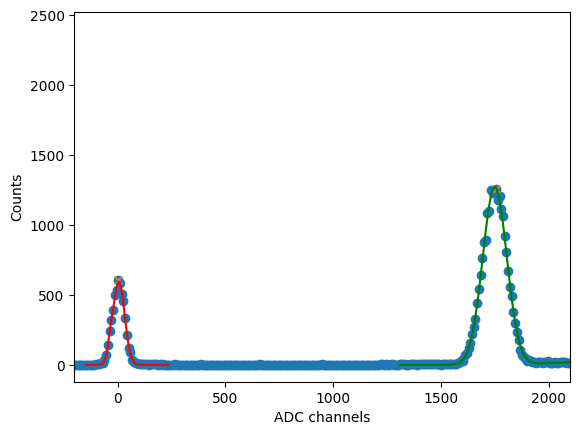

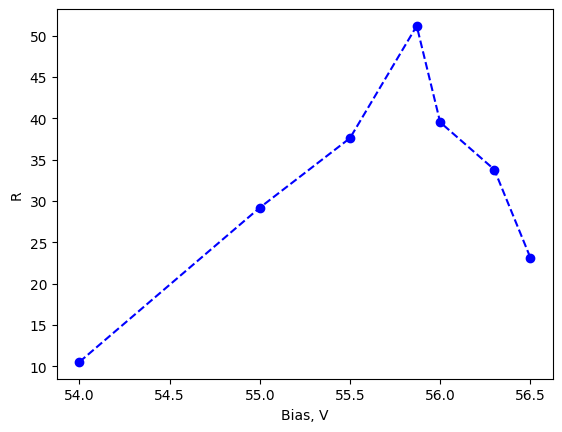

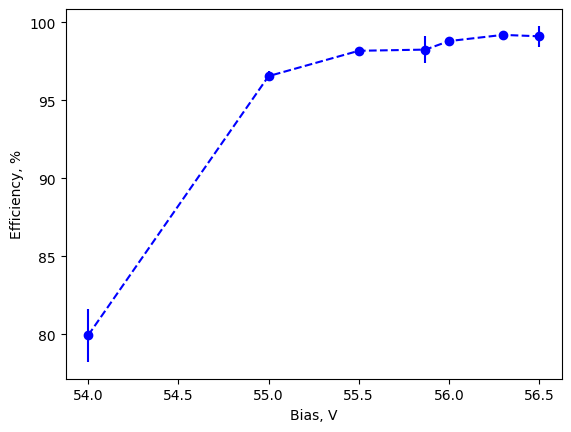

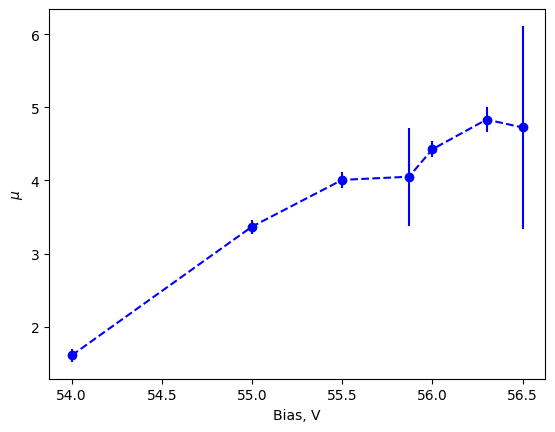

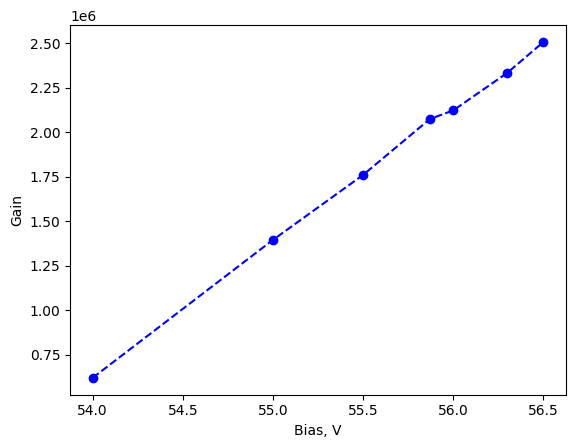

In [4]:
Uarray,Rarray,Gainarray,errGainarray,Effarray,errEffarray,muarray,errmuarray = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

for U in Ulist:
    try:
        fileName = pathIn + "/" + prefix + U + postfix
        print('Анализируем данные из файла:',fileName)
        file = open(fileName)        
    
        x,y = np.array([]), np.array([])
    
        for line in file.readlines():
            line = line.replace(',','.')
            j = line.split()
            j[0] = float(j[0])
            j[1] = float(j[1])
            x = np.append(x, j[0])
            y = np.append(y, j[1])
    except FileNotFoundError:
        print('Can`t open the file',fileName,'. No such file or directory')
    except ValueError:
        print('It`s not a number. Check the data in the file')
    except IndexError:
        print('The index is not in the range of elements. Check the data in the file')
            
    plt.plot(x, y,'o')  
    #plt.bar(x, y, width=8.0)  
    plt.xlabel('ADC channels')
    plt.ylabel('Counts')
    
    if analysis:
        plt.xlim([Xleft, Xright])  
        # Find peaks
        thresh_top    = np.median(y) + 1.0 * np.std(y)
        i_peaks, _ = find_peaks(y,  height =  thresh_top, width=2)
        print('Колличество найденных пиков n_peaks =',len(i_peaks))
        print('Положение пиков на оси X:',x[i_peaks])
        plt.plot(x[i_peaks], y[i_peaks], 'x')
        
        #подгонка 0 пика
        peak0 = x[i_peaks][0]
        x0 = x[(x>FitXBoardLeftP0[Ulist.index(U)]) & (x<FitXBoardRightP0[Ulist.index(U)])]
        y0 = y[(x>FitXBoardLeftP0[Ulist.index(U)]) & (x<FitXBoardRightP0[Ulist.index(U)])]
        top = peak0+FitXBoardRightP0[Ulist.index(U)]
        if fitDoubleGauss:
            init_valsp0 = [.025, peak0, 3., .025, peak0, 3.]
            set_boundsp0 = ([0., -150., 0., 0., -150., 0.], [50000., top, 500., 50000., top, 500.]) 
            p0, cov0 = curve_fit(DoubleGauss, x0, y0, p0=init_valsp0, bounds=set_boundsp0)
            fit_y0 = DoubleGauss(x0, *p0)
        else:
            init_valsp0 = [.025, peak0, 3.]
            set_boundsp0 = ([0., -150., 0.], [50000., top, 500.]) 
            p0, cov0 = curve_fit(Gauss, x0, y0, p0=init_valsp0, bounds=set_boundsp0)
            fit_y0 = Gauss(x0, *p0)    
        
        plt.plot(x0, fit_y0, 'r')
        print("0 пик: Параметры гауссианов: ",p0)
        #print("0 пик: cov0: ",np.sqrt(np.diag(cov0)))
        #оценка погрешности аппроксимации и достоверности модели
        print("Стандартное отклонение: ", np.std(y0-fit_y0))
        slope0, ic0, r_value0, p_value0, std_err0 = stats.linregress(y0,fit_y0)
        print("Квадрат коэффициента корреляции: ", r_value0**2)
        dp0 = \
          [np.sqrt(cov0[j,j]) for j in range(p0.size)]

        #подгонка 1 пика
        peak1 = x[i_peaks][1]    
        x1 = x[(x>FitXBoardLeftP1[Ulist.index(U)]) & (x<FitXBoardRightP1[Ulist.index(U)])]
        y1 = y[(x>FitXBoardLeftP1[Ulist.index(U)]) & (x<FitXBoardRightP1[Ulist.index(U)])]
        top = peak1+FitXBoardRightP1[Ulist.index(U)]
        if fitDoubleGauss:
            init_valsp1 = [.025, peak1, 5., .025, peak1, 5.]
            set_boundsp1 = (0, [50000., top, 500., 50000., top, 500.])
            p1, cov1 = curve_fit(DoubleGauss, x1, y1, p0=init_valsp1, bounds=set_boundsp1 )    
            fit_y1 = DoubleGauss(x1, *p1)       
        else:
            init_valsp1 = [.025, peak1, 5.]    
            set_boundsp1 = (0, [50000., top, 500.])
            p1, cov1 = curve_fit(Gauss, x1, y1, p0=init_valsp1, bounds=set_boundsp1)    
            fit_y1 = Gauss(x1, *p1) 
            
        plt.plot(x1, fit_y1, 'g') 
        print("1 пик: Параметры гауссианов: ",p1)
        print("Стандартное отклонение: ", np.std(y1-fit_y1))
        slope1, ic1, r_value1, p_value1, std_err1 = stats.linregress(y1,fit_y1)
        print("Квадрат коэффициента корреляции: ", r_value1**2)
        dp1 = \
          [np.sqrt(cov1[j,j]) for j in range(p1.size)]
            
        sigma0 = p0[2]        
        errsigma0 = dp0[2]
        mean0 = p0[1]
        errmean0 = dp0[1]        
        if fitDoubleGauss and p0[5]<p0[2]:
            sigma0 = p0[5]
            errsigma0 = dp0[5]
            mean0 = p0[4]
            errmean0 = dp0[4]
        
        sigma1 = p1[2]        
        errsigma1 = dp1[2]
        mean1 = p1[1]
        errmean1 = dp1[1]      
        if fitDoubleGauss and p1[5]<p1[2]:
            sigma1 = p1[5]
            errsigma1 = dp1[5]
            mean1 = p1[4]
            errmean1 = dp1[4]

        print("mean0=",mean0,'+-',errmean0," sigma0=",sigma0,'+-',errsigma0)
        print("mean1=",mean1,'+-',errmean1," sigma1=",sigma1,'+-',errsigma1)
    
        R = (mean1-mean0)/sqrt(pow(sigma1,2)-pow(sigma0,2))
        Gain = (mean1-mean0)*4.*pow(10.0,-14)/(1.6*pow(10,-19)*pow(10.,float(PSAUGAIN)/20.))
        errGain = (errmean1+errmean0)*4.*pow(10.0,-14)/(1.6*pow(10,-19)*pow(10.,float(PSAUGAIN)/20.))
        print("R=",R," Gain=",Gain,'+-',errGain)
    
        NevP0 = sum(y[x<(mean0+5*sigma0)])
        NevTotal = sum(y)
        Eff = (1.-NevP0/NevTotal)*100.
        errNevP0 = sum(y[x<(mean0+1*sigma0)])
        errEff =  (1.-errNevP0/NevTotal)*100.-Eff
        mu = -math.log(NevP0/NevTotal)
        errmu = -math.log(errNevP0/NevTotal)-mu
        print('Eff=',Eff,'+-',errEff,' mu=',mu,'+-',errmu,' NevP0=',NevP0,' NevTotal=',NevTotal)
        print('*********************************************************************')
    
        U = U.replace(',','.')
        Uarray = np.append(Uarray, float(U))
        Rarray = np.append(Rarray, R)
        Gainarray = np.append(Gainarray, Gain)
        errGainarray = np.append(errGainarray, errGain)
        Effarray = np.append(Effarray, Eff)
        errEffarray = np.append(errEffarray, errEff)
        muarray = np.append(muarray, mu)
        errmuarray = np.append(errmuarray, errmu) 
    
    plt.savefig(pathOut + '/' + U + outSpectr)
    plt.show()    
    
if analysis:
    plt.plot(Uarray, Rarray,'ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('R')
    plt.savefig(pathOut + '/' + outR)
    plt.show()

    #plt.plot(Uarray, Effarray,'ob--')
    plt.errorbar(Uarray, Effarray, yerr=errEffarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('Efficiency, %')
    plt.savefig(pathOut + '/' + outEff)
    plt.show()
    
    #plt.plot(Uarray, muarray,'ob--')
    plt.errorbar(Uarray, muarray, yerr=errmuarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel(r'$\mu$')
    plt.savefig(pathOut + '/' + outmu)
    plt.show()

    plt.plot(Uarray, Gainarray,'ob--')
    #plt.errorbar(Uarray, Gainarray, yerr=errGainarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('Gain')
    plt.savefig(pathOut + '/' + outGain)
    plt.show()